# Installation and importing required packages 

In [1]:
import time
start_time = time.time()

In [2]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import pandas_profiling
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler, LabelEncoder

from numpy import linalg
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
from sklearn import tree
from sklearn.svm import SVR
import xgboost as xgb

import csv

from sklearn.feature_selection import SelectKBest, f_regression, RFE


<ipython-input-4-249818eeb683>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


# Data Collection and Description

In [5]:
# Reading Train datasets
train = pd.read_csv("Train-Set.csv")
train.head(5)

ProductID  Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.30    Low Fat           0.016047                  Dairy   
1     DRC01    5.92    Regular           0.019278            Soft Drinks   
2     FDN15   17.50    Low Fat           0.016760                   Meat   
3     FDX07   19.20    Regular           0.000000  Fruits and Vegetables   
4     NCD19    8.93    Low Fat           0.000000              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998        NaN       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  OutletSales  
0  Supermarket Type1    3735.1380  
1  Supermarket Type2     443.4228  
2  Supermarket Type1    2097.2700  
3      Grocery Store     732.3800  
4  Supermarket Type1     994.7052

In [6]:
# Reading Test datasets
test = pd.read_csv("Test-Set.csv")
test.head(5)

ProductID  Weight FatContent  ProductVisibility  ProductType       MRP  \
0     FDW58  20.750    Low Fat           0.007565  Snack Foods  107.8622   
1     FDW14   8.300        reg           0.038428        Dairy   87.3198   
2     NCN55  14.600    Low Fat           0.099575       Others  241.7538   
3     FDQ58   7.315    Low Fat           0.015388  Snack Foods  155.0340   
4     FDY38     NaN    Regular           0.118599        Dairy  234.2300   

  OutletID  EstablishmentYear OutletSize LocationType         OutletType  
0   OUT049               1999     Medium       Tier 1  Supermarket Type1  
1   OUT017               2007        NaN       Tier 2  Supermarket Type1  
2   OUT010               1998        NaN       Tier 3      Grocery Store  
3   OUT017               2007        NaN       Tier 2  Supermarket Type1  
4   OUT027               1985     Medium       Tier 3  Supermarket Type3

In [7]:
# Columns in the datasets 
print('Columns in Train set', train.columns)
print('Columns in Test set', test.columns)

Columns in Train set Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')
Columns in Test set Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')


In [8]:
# shape of datasets
print('Shape of Train set', train.shape)
print('Shape of Test set', test.shape)

Shape of Train set (8523, 12)
Shape of Test set (5681, 11)


In [9]:
# Different data types in the datasets
print('Description of Train set \n ')
train.info()

Description of Train set 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
print('Description of Train set \n')
test.info()

Description of Train set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Data Preprocessing

## Handling missing values

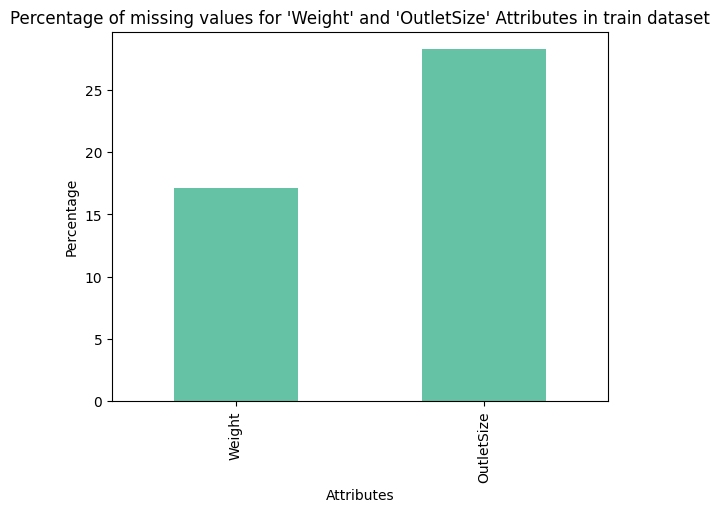

In [11]:
#Calculating the missing values percentage
Missing_data = train[['Weight', "OutletSize"]]

missing_percentage = Missing_data.isnull().sum() / len(Missing_data) * 100

missing_percentage.plot(kind='bar', x='Column', y='Percentage', colormap='Set2')

plt.xlabel("Attributes")
plt.ylabel("Percentage")
plt.title("Percentage of missing values for 'Weight' and 'OutletSize' Attributes in train dataset" )

plt.show()

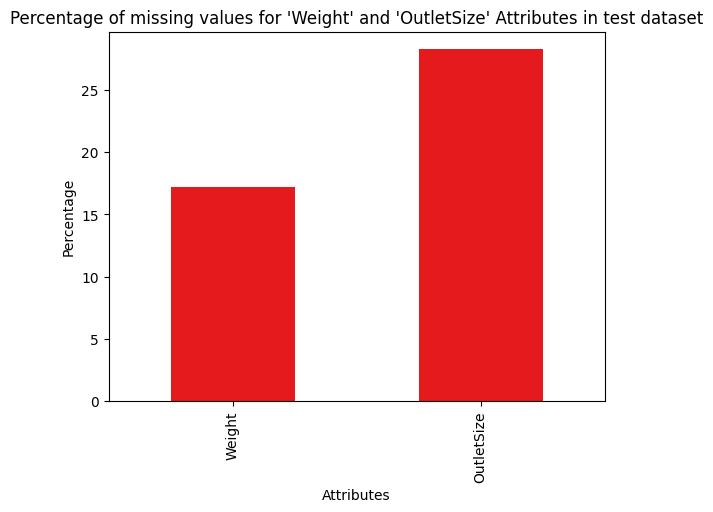

In [12]:
Missing_data1 = test[['Weight', "OutletSize"]]
missing_percentage1 = Missing_data1.isnull().sum() / len(Missing_data1) * 100
missing_percentage1.plot(kind='bar', x='Column', y='Percentage', colormap='Set1')
plt.xlabel("Attributes")
plt.ylabel("Percentage")
plt.title("Percentage of missing values for 'Weight' and 'OutletSize' Attributes in test dataset")
plt.show()

In [13]:
train_sorted = train.sort_values(by=['ProductID'])
train_sorted.head(10)

ProductID  Weight FatContent  ProductVisibility  ProductType       MRP  \
8043     DRA12   11.60    Low Fat           0.068535  Soft Drinks  143.0154   
118      DRA12   11.60    Low Fat           0.041178  Soft Drinks  140.3154   
1693     DRA12   11.60         LF           0.000000  Soft Drinks  141.9154   
1197     DRA12   11.60    Low Fat           0.000000  Soft Drinks  141.6154   
1245     DRA12   11.60    Low Fat           0.040912  Soft Drinks  142.3154   
7467     DRA12   11.60    Low Fat           0.041113  Soft Drinks  142.0154   
8195     DRA24   19.35    Regular           0.039895  Soft Drinks  162.4868   
6863     DRA24   19.35    Regular           0.039990  Soft Drinks  165.0868   
2879     DRA24     NaN    Regular           0.069909  Soft Drinks  163.2868   
4416     DRA24     NaN    Regular           0.039735  Soft Drinks  165.7868   

     OutletID  EstablishmentYear OutletSize LocationType         OutletType  \
8043   OUT010               1998        NaN       Tier 3      Grocery Store   
118    OUT017               2007        NaN       Tier 2  Supermarket Type1   
1693   OUT035               2004      Small       Tier 2  Supermarket Type1   
1197   OUT045               2002        NaN       Tier 2  Supermarket Type1   
1245   OUT013               1987       High       Tier 3  Supermarket Type1   
7467   OUT018               2009     Medium       Tier 3  Supermarket Type2   
8195   OUT013               1987       High       Tier 3  Supermarket Type1   
6863   OUT049               1999     Medium       Tier 1  Supermarket Type1   
2879   OUT019               1985      Small       Tier 1      Grocery Store   
4416   OUT027               1985     Medium       Tier 3  Supermarket Type3   

      OutletSales  
8043     283.6308  
118     2552.6772  
1693     992.7078  
1197    3829.0158  
1245    2552.6772  
7467     850.8924  
8195    4422.2436  
6863     982.7208  
2879     491.3604  
4416    4913.6040

In [14]:
train_sorted.tail(10)

ProductID  Weight FatContent  ProductVisibility         ProductType  \
2084     NCZ53     NaN    Low Fat           0.024359  Health and Hygiene   
1267     NCZ53    9.60    Low Fat           0.024577  Health and Hygiene   
3959     NCZ53    9.60    Low Fat           0.024457  Health and Hygiene   
2839     NCZ54   14.65    Low Fat           0.083359           Household   
1969     NCZ54   14.65    Low Fat           0.083528           Household   
7926     NCZ54   14.65    Low Fat           0.083489           Household   
214      NCZ54   14.65    Low Fat           0.000000           Household   
1896     NCZ54     NaN    Low Fat           0.082956           Household   
7166     NCZ54     NaN    Low Fat           0.145952           Household   
7738     NCZ54   14.65    Low Fat           0.083699           Household   

           MRP OutletID  EstablishmentYear OutletSize LocationType  \
2084  190.4214   OUT027               1985     Medium       Tier 3   
1267  186.6214   OUT018               2009     Medium       Tier 3   
3959  186.6214   OUT013               1987       High       Tier 3   
2839  161.9552   OUT046               1997      Small       Tier 1   
1969  162.4552   OUT045               2002        NaN       Tier 2   
7926  161.3552   OUT049               1999     Medium       Tier 1   
214   161.5552   OUT010               1998        NaN       Tier 3   
1896  164.0552   OUT027               1985     Medium       Tier 3   
7166  160.9552   OUT019               1985      Small       Tier 1   
7738  163.4552   OUT018               2009     Medium       Tier 3   

             OutletType  OutletSales  
2084  Supermarket Type3    5652.6420  
1267  Supermarket Type2    1884.2140  
3959  Supermarket Type1    3203.1638  
2839  Supermarket Type1    4711.2008  
1969  Supermarket Type1    2274.3728  
7926  Supermarket Type1    7148.0288  
214       Grocery Store     324.9104  
1896  Supermarket Type3    5523.4768  
7166      Grocery Store     162.4552  
7738  Supermarket Type2    2599.2832

In [15]:
test_sorted = test.sort_values(by=['ProductID'])
test_sorted.head(10)

ProductID  Weight FatContent  ProductVisibility  ProductType       MRP  \
5081     DRA12   11.60         LF           0.041010  Soft Drinks  141.0154   
500      DRA12   11.60    Low Fat           0.040946  Soft Drinks  142.9154   
3912     DRA12     NaN    Low Fat           0.040748  Soft Drinks  140.0154   
2847     DRA24   19.35    Regular           0.040091  Soft Drinks  163.6868   
4538     DRA24   19.35    Regular           0.039928  Soft Drinks  164.5868   
1211     DRA24   19.35    Regular           0.040009  Soft Drinks  163.2868   
3666     DRA59    8.27    Regular           0.128187  Soft Drinks  184.3924   
4334     DRA59    8.27        reg           0.127904  Soft Drinks  183.9924   
104      DRB01     NaN    low fat           0.143991  Soft Drinks  191.5530   
5063     DRB01    7.39    Low Fat           0.000000  Soft Drinks  191.7530   

     OutletID  EstablishmentYear OutletSize LocationType         OutletType  
5081   OUT049               1999     Medium       Tier 1  Supermarket Type1  
500    OUT046               1997      Small       Tier 1  Supermarket Type1  
3912   OUT027               1985     Medium       Tier 3  Supermarket Type3  
2847   OUT018               2009     Medium       Tier 3  Supermarket Type2  
4538   OUT046               1997      Small       Tier 1  Supermarket Type1  
1211   OUT045               2002        NaN       Tier 2  Supermarket Type1  
3666   OUT045               2002        NaN       Tier 2  Supermarket Type1  
4334   OUT035               2004      Small       Tier 2  Supermarket Type1  
104    OUT019               1985      Small       Tier 1      Grocery Store  
5063   OUT035               2004      Small       Tier 2  Supermarket Type1

In [16]:
test_sorted.tail(10)

ProductID  Weight FatContent  ProductVisibility         ProductType  \
2534     NCZ42     NaN    Low Fat           0.019764           Household   
4825     NCZ42   10.50    Low Fat           0.011334           Household   
1119     NCZ42   10.50         LF           0.011311           Household   
1241     NCZ53    9.60    Low Fat           0.024473  Health and Hygiene   
2875     NCZ53    9.60    Low Fat           0.024527  Health and Hygiene   
2318     NCZ53    9.60    Low Fat           0.024616  Health and Hygiene   
1730     NCZ53    9.60    Low Fat           0.024477  Health and Hygiene   
2907     NCZ54   14.65    Low Fat           0.083344           Household   
4307     NCZ54   14.65    Low Fat           0.083290           Household   
4700     NCZ54   14.65    Low Fat           0.083831           Household   

           MRP OutletID  EstablishmentYear OutletSize LocationType  \
2534  236.3248   OUT019               1985      Small       Tier 1   
4825  236.8248   OUT018               2009     Medium       Tier 3   
1119  238.7248   OUT045               2002        NaN       Tier 2   
1241  187.2214   OUT035               2004      Small       Tier 2   
2875  188.5214   OUT045               2002        NaN       Tier 2   
2318  190.0214   OUT017               2007        NaN       Tier 2   
1730  189.6214   OUT046               1997      Small       Tier 1   
2907  163.6552   OUT035               2004      Small       Tier 2   
4307  160.4552   OUT013               1987       High       Tier 3   
4700  161.4552   OUT017               2007        NaN       Tier 2   

             OutletType  
2534      Grocery Store  
4825  Supermarket Type2  
1119  Supermarket Type1  
1241  Supermarket Type1  
2875  Supermarket Type1  
2318  Supermarket Type1  
1730  Supermarket Type1  
2907  Supermarket Type1  
4307  Supermarket Type1  
4700  Supermarket Type1

In [17]:
#Filling the missing weight values
train['Weight'] = train.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))
test['Weight'] = test.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))

In [18]:
train.isnull().sum()

ProductID               0
Weight                  4
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [19]:
test.isnull().sum()

ProductID               0
Weight                 20
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [20]:
outlet_unique_sizes_train = train.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_train

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [21]:
outlet_unique_sizes_test = test.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_test

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [22]:
outlettype_unique_sizes_train = train.groupby('OutletID')['OutletType'].unique()
outlettype_unique_sizes_train

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [23]:
outlettype_unique_sizes_test = test.groupby('OutletID')['OutletType'].unique()
outlettype_unique_sizes_test

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [24]:
outletsize_unique_sizes_train = train.groupby('OutletType')['OutletSize'].unique()
outletsize_unique_sizes_train

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [25]:
outletsize_unique_sizes_test = test.groupby('OutletType')['OutletSize'].unique()
outletsize_unique_sizes_test

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, nan, Small, High]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [26]:
# To fill the missing values in 'OutetSize' having'OutletType' --- 'Grocery Store', we can fill with 'Small' as it's has only one value 'Small'
train.loc[(train['OutletType'] == 'Grocery Store') & (train['OutletSize'].isna()), 'OutletSize'] = 'Small'
test.loc[(test['OutletType'] == 'Grocery Store') & (test['OutletSize'].isna()), 'OutletSize'] = 'Small'

In [27]:
# To fill the missing values in 'OutetSize' having 'OutletType' --- 'Supermarket Type1', we can fill with mode value
# With mode for OutletSize
train['OutletSize'].fillna(train['OutletSize'].mode()[0], inplace=True)
test['OutletSize'].fillna(test['OutletSize'].mode()[0], inplace=True)

In [28]:
train.isnull().sum()

ProductID            0
Weight               4
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [29]:
test.isnull().sum()

ProductID             0
Weight               20
FatContent            0
ProductVisibility     0
ProductType           0
MRP                   0
OutletID              0
EstablishmentYear     0
OutletSize            0
LocationType          0
OutletType            0
dtype: int64

In [30]:
# With mean for Weight
train['Weight'].fillna(train['Weight'].mean(), inplace=True)
test['Weight'].fillna(test['Weight'].mean(), inplace=True)

In [31]:
test.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [32]:
train.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

## Handling outliers

In [33]:
# Finding the outliers in the train dataset

# Calculate the z-score for each column
z_scores = np.abs((train - train.mean()) / train.std())

# Identify potential outliers
outliers = (z_scores > 3).any(axis=1)

print("Number of potential outliers:", outliers.sum())
print("Indices of potential outliers:", train[outliers].index)

Number of potential outliers: 185
Indices of potential outliers: Int64Index([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,
            ...
            7949, 8039, 8194, 8201, 8215, 8245, 8273, 8345, 8432, 8447],
           dtype='int64', length=185)


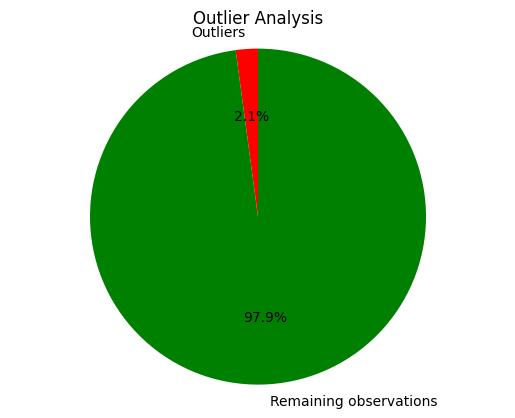

In [34]:
labels = ['Outliers', 'Remaining observations']
sizes = [outliers.sum(), len(train)]
colors = ['red', 'green']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Outlier Analysis')
plt.show()

In [35]:
# Remove outliers as their quantity is very low when compared to whole dataset
train = train[~outliers]

print("Number of removed outliers:", outliers.sum())
print("Number of remaining observations:", len(train))

Number of removed outliers: 185
Number of remaining observations: 8338


Number of potential outliers: 81
Indices of potential outliers: Int64Index([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
             871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
            1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
            2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
            3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
            4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
            4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
            5482, 5514, 5571, 5668],
           dtype='int64')


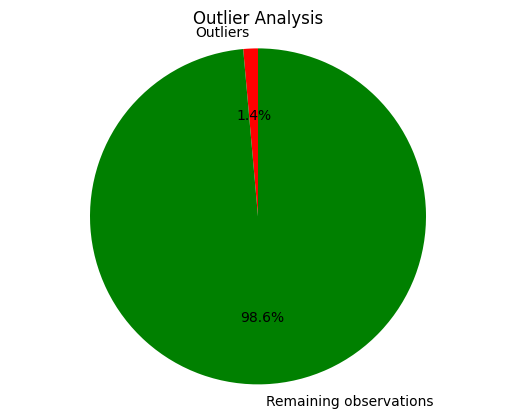

In [36]:
# Calculate the z-score for each column
z_scores = np.abs((test - test.mean()) / test.std())

# Identify potential outliers
outliers = (z_scores > 3).any(axis=1)

print("Number of potential outliers:", outliers.sum())
print("Indices of potential outliers:", test[outliers].index)
labels = ['Outliers', 'Remaining observations']
sizes = [outliers.sum(), len(test)]
colors = ['red', 'green']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Outlier Analysis')
plt.show()

In [37]:
# Remove outliers as their quantity is very low when compared to whole dataset
test = test[~outliers]

print("Number of removed outliers:", outliers.sum())
print("Number of remaining observations:", len(test))

Number of removed outliers: 81
Number of remaining observations: 5600


## Handling duplicates

In [38]:
# Checking duplicate rows
print("Number of duplicates in train dataset:", train.duplicated().sum())
print("Number of duplicates in test dataset:", test.duplicated().sum())

Number of duplicates in train dataset: 0
Number of duplicates in test dataset: 0


## Visualizing the datasets using pandas_profiling

In [39]:
# Generate the report
train_vis = pd.read_csv('Train-Set.csv')
train_report = pandas_profiling.ProfileReport(train_vis)

train_report.to_file('Big_Mart_Sales_report_train.html')

display(train_report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
# Generate the report
test_vis = pd.read_csv('Test-Set.csv')
test_report = pandas_profiling.ProfileReport(test_vis)

test_report.to_file('Big_Mart_Sales_report_test.html')

display(test_report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Standardizing the "FatContent" column

In [41]:
train['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [42]:
test['FatContent'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [43]:
train['FatContent'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['FatContent'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
train['FatContent']= train['FatContent'].astype(str)
test['FatContent']= test['FatContent'].astype(str)

In [44]:
train['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [45]:
test['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## Applying Label and One-hot encoding

In [46]:
train1 = pd.DataFrame.copy(train)
test1= pd.DataFrame.copy(test)

In [47]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit and transform the categorical column
train['FatContent'] = le.fit_transform(train['FatContent'])
train['ProductType'] = le.fit_transform(train['ProductType'])
train['OutletSize'] = le.fit_transform(train['OutletSize'])
train['LocationType'] = le.fit_transform(train['LocationType'])
train['OutletType'] = le.fit_transform(train['OutletType'])


In [48]:
test['FatContent'] = le.fit_transform(test['FatContent'])
test['ProductType'] = le.fit_transform(test['ProductType'])
test['OutletSize'] = le.fit_transform(test['OutletSize'])
test['LocationType'] = le.fit_transform(test['LocationType'])
test['OutletType'] = le.fit_transform(test['OutletType'])

In [49]:
train['ProductType'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [50]:
test['ProductType'].unique()

array([13,  4, 11,  6,  0,  8,  1,  7, 12, 14,  9,  5, 10,  3, 15,  2])

In [51]:
train.head(10)

ProductID  Weight  FatContent  ProductVisibility  ProductType       MRP  \
0     FDA15   9.300           0           0.016047            4  249.8092   
1     DRC01   5.920           1           0.019278           14   48.2692   
2     FDN15  17.500           0           0.016760           10  141.6180   
3     FDX07  19.200           1           0.000000            6  182.0950   
4     NCD19   8.930           0           0.000000            9   53.8614   
5     FDP36  10.395           1           0.000000            0   51.4008   
6     FDO10  13.650           1           0.012741           13   57.6588   
7     FDP10  19.000           0           0.127470           13  107.7622   
8     FDH17  16.200           1           0.016687            5   96.9726   
9     FDU28  19.200           1           0.094450            5  187.8214   

  OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  \
0   OUT049               1999           1             0           1   
1   OUT018               2009           1             2           2   
2   OUT049               1999           1             0           1   
3   OUT010               1998           2             2           0   
4   OUT013               1987           0             2           1   
5   OUT018               2009           1             2           2   
6   OUT013               1987           0             2           1   
7   OUT027               1985           1             2           3   
8   OUT045               2002           2             1           1   
9   OUT017               2007           2             1           1   

   OutletSales  
0    3735.1380  
1     443.4228  
2    2097.2700  
3     732.3800  
4     994.7052  
5     556.6088  
6     343.5528  
7    4022.7636  
8    1076.5986  
9    4710.5350

In [52]:
test.head(10)

ProductID  Weight  FatContent  ProductVisibility  ProductType       MRP  \
0     FDW58  20.750           0           0.007565           13  107.8622   
1     FDW14   8.300           1           0.038428            4   87.3198   
2     NCN55  14.600           0           0.099575           11  241.7538   
3     FDQ58   7.315           0           0.015388           13  155.0340   
4     FDY38  13.600           1           0.118599            4  234.2300   
5     FDH56   9.800           1           0.063817            6  117.1492   
6     FDL48  19.350           1           0.082602            0   50.1034   
7     FDC48   9.195           0           0.015782            0   81.0592   
8     FDN33   6.305           1           0.123365           13   95.7436   
9     FDA36   5.985           0           0.005698            0  186.8924   

  OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  
0   OUT049               1999           1             0           1  
1   OUT017               2007           2             1           1  
2   OUT010               1998           2             2           0  
3   OUT017               2007           2             1           1  
4   OUT027               1985           1             2           3  
5   OUT046               1997           2             0           1  
6   OUT018               2009           1             2           2  
7   OUT027               1985           1             2           3  
8   OUT045               2002           2             1           1  
9   OUT017               2007           2             1           1

<AxesSubplot: >

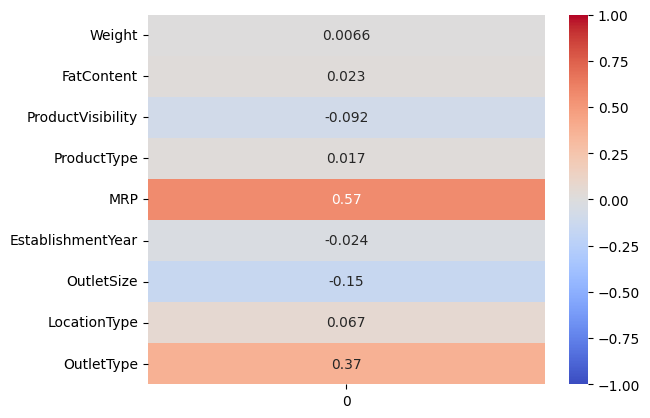

In [53]:
import seaborn as sns

# Separate target variable from predictor variables
X = train.drop("OutletSales", axis=1)
y = train["OutletSales"]

# Calculate correlation matrix
corr_matrix = X.corrwith(y)

# Visualize as heatmap
sns.heatmap(corr_matrix.to_frame(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)

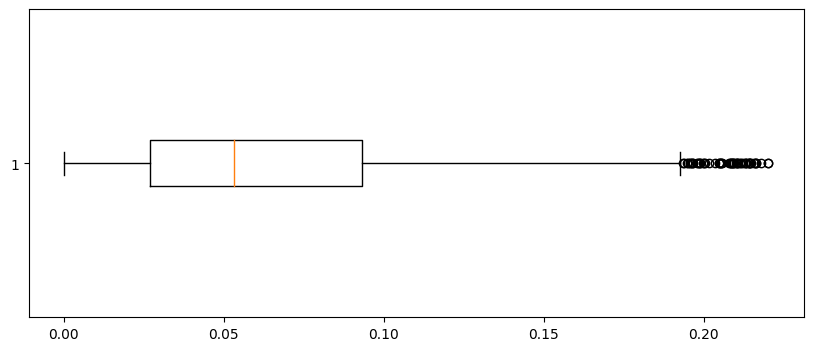

In [54]:
# Numeric Attributes are  'Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear'
# Outliers of ProductVisibility
plt.figure(figsize=(10, 4))
plt.boxplot(train['ProductVisibility'],vert = False)
plt.show()

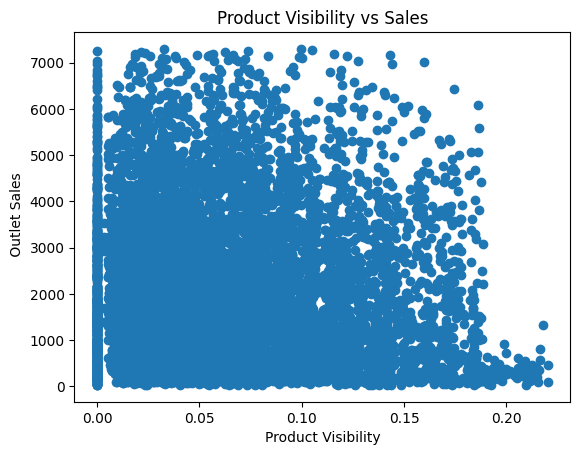

In [55]:
plt.scatter(train['ProductVisibility'], train['OutletSales'])
plt.title('Product Visibility vs Sales')
plt.xlabel('Product Visibility')
plt.ylabel(' Outlet Sales')
plt.show()

In [56]:
X.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [57]:
# Apply one hot encoding to ProductID column
product_id_encoding = pd.get_dummies(train['ProductID'], prefix='ProductID')
train_1 = pd.concat([train, product_id_encoding], axis=1)

# Drop original ProductID column
train_1 = train.drop(['ProductID'], axis=1)

In [58]:
# Convert categorical features into numerical format using one-hot encoding
df_encoded = pd.get_dummies(train_1, columns=["ProductType", "OutletID", "OutletSize", "LocationType", "OutletType"])
df_encoded.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'OutletSales', 'ProductType_0', 'ProductType_1', 'ProductType_2',
       'ProductType_3', 'ProductType_4', 'ProductType_5', 'ProductType_6',
       'ProductType_7', 'ProductType_8', 'ProductType_9', 'ProductType_10',
       'ProductType_11', 'ProductType_12', 'ProductType_13', 'ProductType_14',
       'ProductType_15', 'OutletID_OUT010', 'OutletID_OUT013',
       'OutletID_OUT017', 'OutletID_OUT018', 'OutletID_OUT019',
       'OutletID_OUT027', 'OutletID_OUT035', 'OutletID_OUT045',
       'OutletID_OUT046', 'OutletID_OUT049', 'OutletSize_0', 'OutletSize_1',
       'OutletSize_2', 'LocationType_0', 'LocationType_1', 'LocationType_2',
       'OutletType_0', 'OutletType_1', 'OutletType_2', 'OutletType_3'],
      dtype='object')

In [59]:
# Apply one hot encoding to ProductID column
product_id_encoding_test = pd.get_dummies(test['ProductID'], prefix='ProductID')
test_1 = pd.concat([test, product_id_encoding_test], axis=1)

# Drop original ProductID column
test_1 = test.drop(['ProductID'], axis=1)

# Convert categorical features into numerical format using one-hot encoding
df_encoded_test = pd.get_dummies(test_1, columns=["ProductType", "OutletID", "OutletSize", "LocationType", "OutletType"])
df_encoded_test.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'ProductType_0', 'ProductType_1', 'ProductType_2', 'ProductType_3',
       'ProductType_4', 'ProductType_5', 'ProductType_6', 'ProductType_7',
       'ProductType_8', 'ProductType_9', 'ProductType_10', 'ProductType_11',
       'ProductType_12', 'ProductType_13', 'ProductType_14', 'ProductType_15',
       'OutletID_OUT010', 'OutletID_OUT013', 'OutletID_OUT017',
       'OutletID_OUT018', 'OutletID_OUT019', 'OutletID_OUT027',
       'OutletID_OUT035', 'OutletID_OUT045', 'OutletID_OUT046',
       'OutletID_OUT049', 'OutletSize_0', 'OutletSize_1', 'OutletSize_2',
       'LocationType_0', 'LocationType_1', 'LocationType_2', 'OutletType_0',
       'OutletType_1', 'OutletType_2', 'OutletType_3'],
      dtype='object')

##Principal Components Analysis (PCA)

Text(0.5, 1.0, '1st PC')

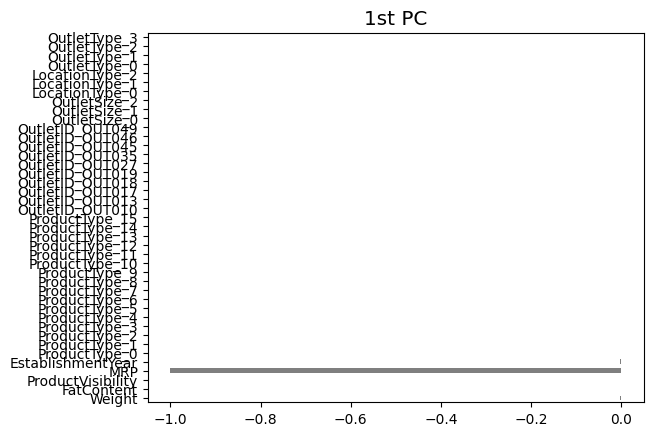

In [60]:
fig,axes = plt.subplots(1,1,sharex=True)

X1 = df_encoded.drop(['OutletSales'], axis=1)
cov = X1.cov().to_numpy()
A = X1.to_numpy()
[eigvals, pcs] = linalg.eig(cov)

attrib = list(X1.columns)         # get attribute names
pcdata  = pd.Series(pcs[:,0], index=attrib)
pcdata.plot(kind='barh',ax=axes,color='k',alpha=0.5)
axes.set_title(r'1st PC', size = 'x-large')

Text(0.5, 1.0, '1st PC')

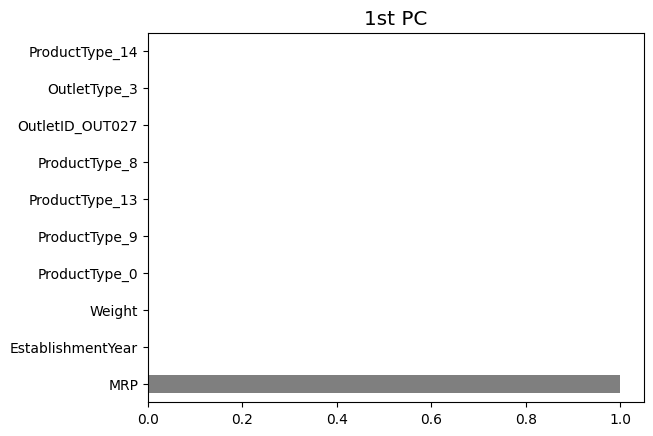

In [61]:
fig,axes = plt.subplots(1,1,sharex=True)

X1 = df_encoded.drop(['OutletSales'], axis=1)
cov = X1.cov().to_numpy()
A = X1.to_numpy()
[eigvals, pcs] = linalg.eig(cov)

attrib = list(X1.columns)         # get attribute names
pcdata  = pd.Series(pcs[:,0], index=attrib)
pcdata_sorted = pcdata.abs().sort_values(ascending=False)[:10] # get top 5 attributes
pcdata_sorted.plot(kind='barh',ax=axes,color='k',alpha=0.5)
axes.set_title(r'1st PC', size = 'x-large')


In [62]:
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# Initialize and fit PCA model
pca = PCA()
pca.fit(X)

# Get explained variance ratios for each principal component
explained_variances = pca.explained_variance_ratio_
print(explained_variances)

[9.75943841e-01 1.76857362e-02 5.48845727e-03 2.10591142e-04
 1.08080925e-04 8.81134133e-05 6.94372986e-05 6.33658151e-05
 3.60925227e-05 3.51875107e-05 3.09810766e-05 2.93703010e-05
 2.82197742e-05 2.44234182e-05 2.37001843e-05 2.28478116e-05
 1.96595337e-05 1.94094104e-05 1.55915043e-05 1.40641607e-05
 1.23290665e-05 8.20130220e-06 6.61326742e-06 5.39601807e-06
 4.50052104e-06 3.29132041e-06 1.95485131e-06 5.43356186e-07
 2.53756341e-32 9.68292769e-33 9.68292769e-33 9.68292769e-33
 9.68292769e-33 9.68292769e-33 9.68292769e-33 9.68292769e-33
 9.68292769e-33 9.68292769e-33 9.68292769e-33 9.68292769e-33
 3.69484713e-33]


In [63]:
len(X.columns)

41

In [64]:
xi = np.arange(1, 42, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
print(yi,xi)

[0.97594384 0.99362958 0.99911803 0.99932863 0.99943671 0.99952482
 0.99959426 0.99965762 0.99969372 0.9997289  0.99975988 0.99978925
 0.99981747 0.9998419  0.9998656  0.99988845 0.99990811 0.99992751
 0.99994311 0.99995717 0.9999695  0.9999777  0.99998431 0.99998971
 0.99999421 0.9999975  0.99999946 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


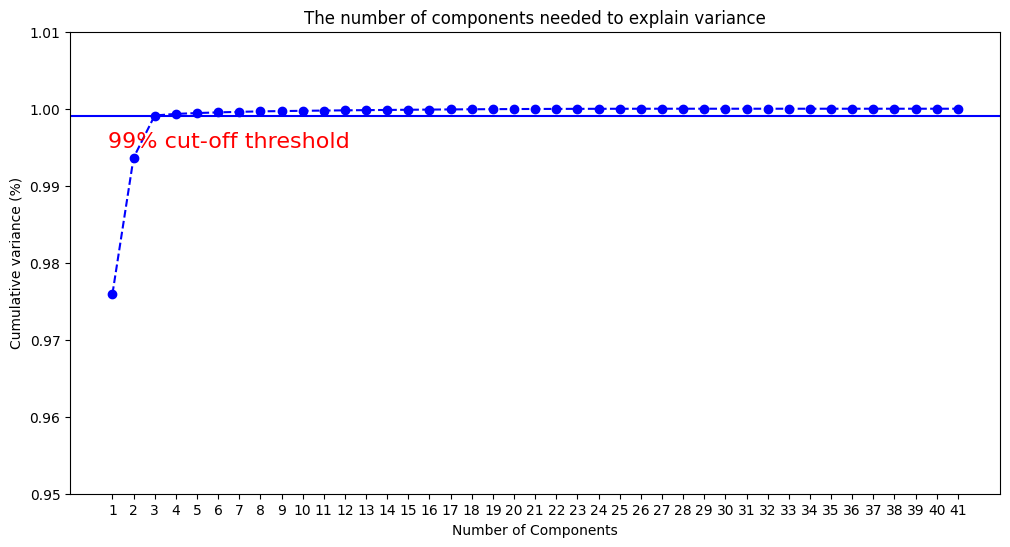

In [65]:
plt.rcParams["figure.figsize"] = (12,6)
plt.ylim(0.95,1.01)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 42, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.999, color='b', linestyle='-')
plt.text(0.8, 0.995, '99% cut-off threshold', color = 'red', fontsize=16)
# ax.grid(axis='x')
plt.show()

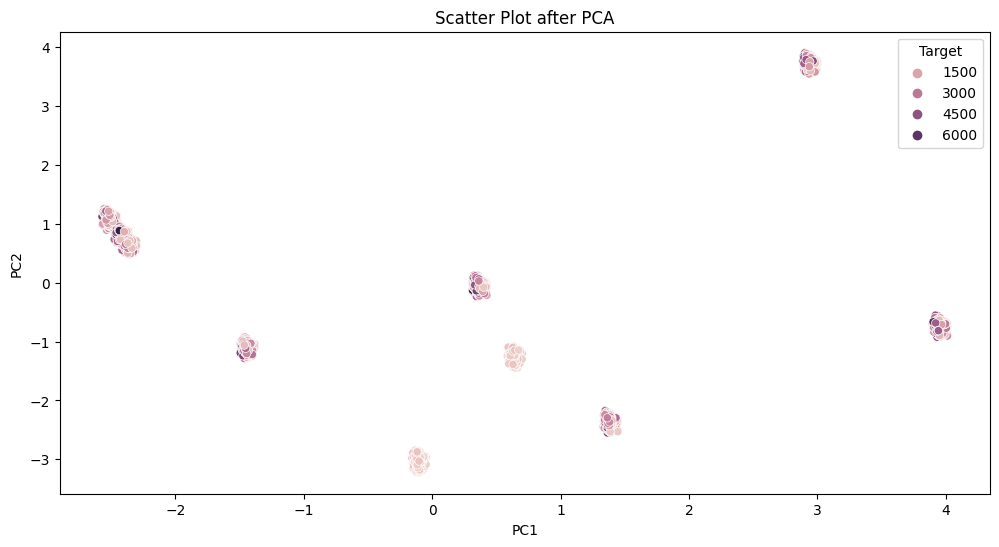

In [66]:
# Initialize and fit PCA model
pca = PCA()
pca.fit(X)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Create a new dataframe for the principal components and target variable
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Target'] = y.values

# Plot the scatter plot with different colors for each target variable
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target')
plt.title('Scatter Plot after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

When the data points in a scatter plot form cluster groups, it means that there are patterns or similarities in the data that can be visually identified. In the context of PCA, the cluster groups may indicate that there are underlying structures or relationships between the predictor variables that are contributing to the variance in the data. By reducing the dimensionality of the data with PCA, we can more easily visualize these patterns and relationships, which can help us to better understand the data and potentially make more accurate predictions or insights. It is important to note, however, that the interpretation of the cluster groups will depend on the specific context and domain of the data, and should be further investigated and validated through additional analysis.

# Time Series Analysis Technique

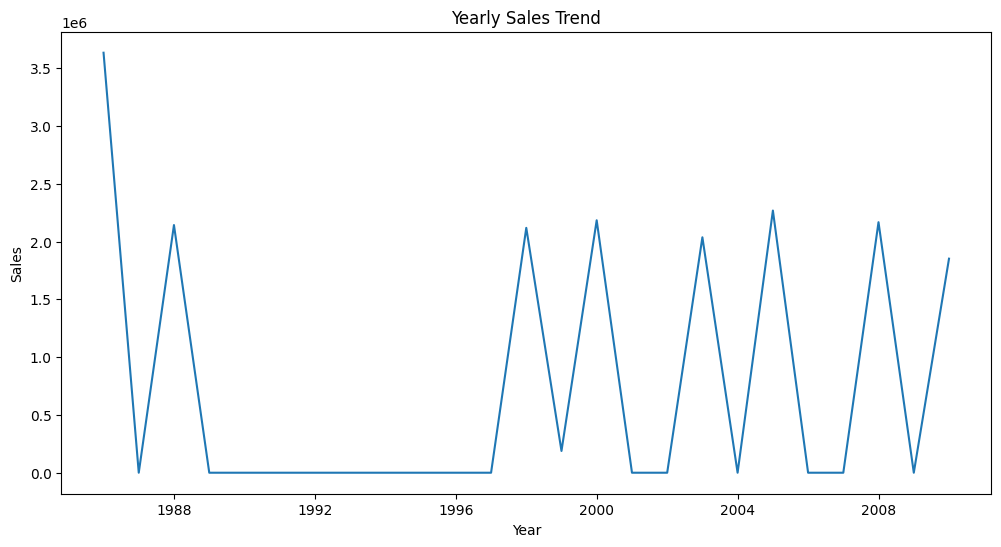

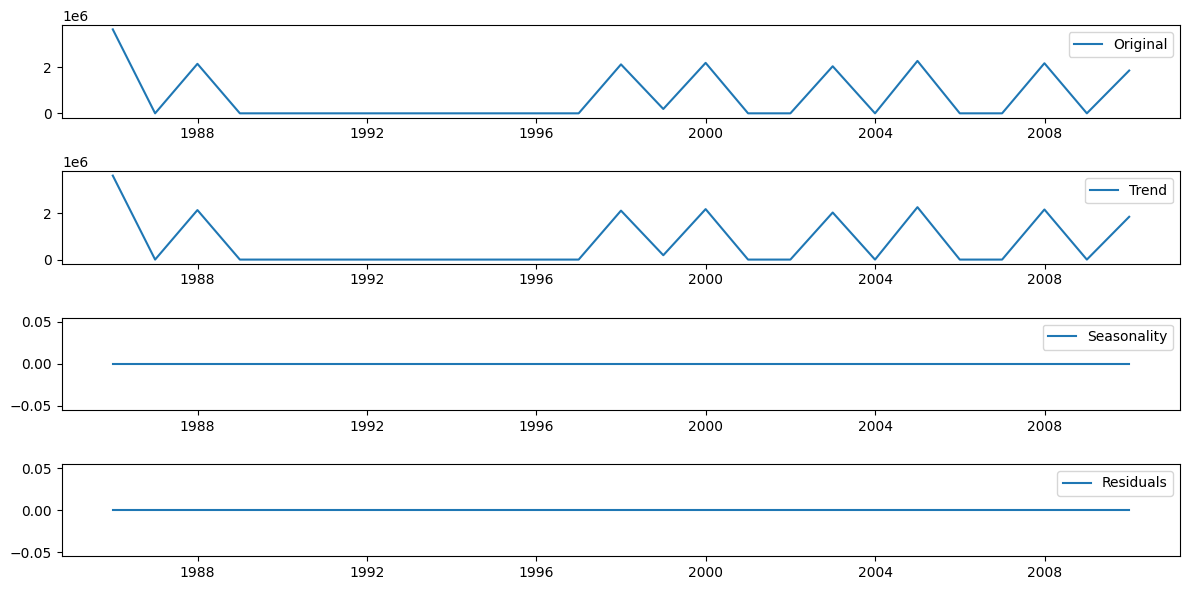

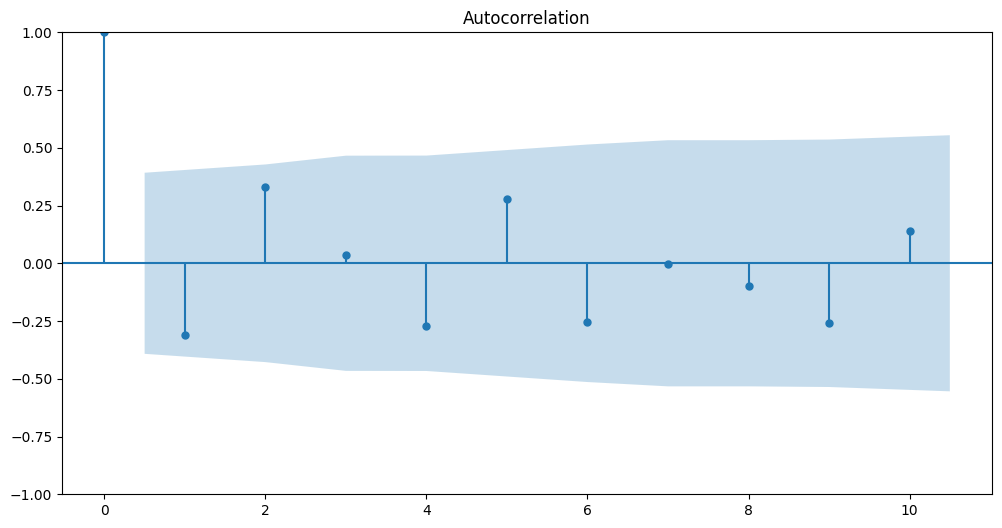

In [67]:
# Load the data
df = pd.read_csv('Train-Set.csv')

# Convert EstablishmentYear to datetime format and set as index
df['EstablishmentYear'] = pd.to_datetime(df['EstablishmentYear'], format='%Y')
df.set_index('EstablishmentYear', inplace=True)

# Resample the data to yearly frequency
df_yearly = df.resample('Y').sum()

# Plot the sales data
plt.plot(df_yearly['OutletSales'])
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Perform time-series decomposition
decomposition = seasonal_decompose(df_yearly['OutletSales'], period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.subplot(411)
plt.plot(df_yearly['OutletSales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_yearly['OutletSales'], lags=10)
plt.show()



# Data Modeling

## Modeling and Hyperparameters Functions

In [68]:
def get_hyperparameters(method):
    # if method == "SVR":
    #     # Hyperparameters for SVR
    #     hyperparameters = {
    #         "kernel": ["linear"],#, "poly", "rbf", "sigmoid"],
    #         "C": [0.1, 1, 10],
    #         "epsilon": [0.01, 0.1, 1],
    #         "gamma": ["scale", "auto"]
    #     }
    #     regressor = SVR()
        
    if method == "Linear Regreesion":
        # Hyperparameters for Linear Regression
        hyperparameters = {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'n_jobs': [-1, None],
            'positive': [True, False]
        }
        regressor = LinearRegression()

    elif method == "XGB":
        # Hyperparameters for XGBoost
        hyperparameters =  {
            'n_estimators': [50, 100, 150],
              'max_depth': [3, 5, 7]
              }
        regressor = xgb.XGBRegressor()
        
    elif method == "Gradient Boosting Regressor":
        # Hyperparameters for Gradient Boosting Regressor
        hyperparameters = {
              'n_estimators': [100, 200, 300]
               ,'learning_rate': [0.01, 0.1, 1]
              }
        regressor = GradientBoostingRegressor(random_state=42)
        
    elif method == "Decision Tree":
        # Hyperparameters for Decision Tree
        hyperparameters = {
            "criterion": ["mse", "friedman_mse", "mae"],
            "max_depth": [3, 5, 7, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
        regressor = DecisionTreeRegressor()
        
    elif method == "Lasso":
        # Hyperparameters for Lasso Regression
        hyperparameters = {
            "alpha": [0.1, 1, 10],
            "fit_intercept": [True, False],
            "copy_X": [True, False],
            "selection": ["cyclic", "random"]
        }
        regressor = Lasso()
        
    elif method == "Ridge":
        # Hyperparameters for Ridge Regression
        hyperparameters = {
            "alpha": [0.1, 1, 10],
            "fit_intercept": [True, False],
            "copy_X": [True, False],
            "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
        }
        regressor = Ridge()
    
    # Use GridSearchCV to perform hyperparameter tuning
    grid_search = GridSearchCV(regressor, hyperparameters, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
    
    return grid_search


In [69]:
# Create a list of models
models = ['Linear Regreesion', 'Ridge','Decision Tree','Lasso', 'XGB','Gradient Boosting Regressor']

# Create an empty dictionary to store the results
results = {'Model': [], 'MSE': [], 'R-squared': [], 'MAE': [], 'RMSE': []}

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through each model
for model in models:
    # Create the hyperparameter-tuned model
    tuned_model = get_hyperparameters(model)

    # Fit the model on the training data
    tuned_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = tuned_model.predict(X_test)

    # Calculate the mean squared error, mean absolute error, root mean squared error, and r-squared score
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Add the results to the dictionary
    results['Model'].append(str(model).split('(')[0])
    results['MSE'].append(mse)
    results['R-squared'].append(r2)
    results['MAE'].append(mae)
    results['RMSE'].append(rmse)
    print(results)

{'Model': ['Linear Regreesion'], 'MSE': [1115628.1314387335], 'R-squared': [0.5565063283546319], 'MAE': [800.2529769784175], 'RMSE': [1056.2329910766532]}
{'Model': ['Linear Regreesion', 'Ridge'], 'MSE': [1115628.1314387335, 1112790.9419533492], 'R-squared': [0.5565063283546319, 0.5576341912567659], 'MAE': [800.2529769784175, 799.0128321481551], 'RMSE': [1056.2329910766532, 1054.88906618343]}
{'Model': ['Linear Regreesion', 'Ridge', 'Decision Tree'], 'MSE': [1115628.1314387335, 1112790.9419533492, 1062641.886205114], 'R-squared': [0.5565063283546319, 0.5576341912567659, 0.5775698564095001], 'MAE': [800.2529769784175, 799.0128321481551, 743.4570947556844], 'RMSE': [1056.2329910766532, 1054.88906618343, 1030.8452290257321]}
{'Model': ['Linear Regreesion', 'Ridge', 'Decision Tree', 'Lasso'], 'MSE': [1115628.1314387335, 1112790.9419533492, 1062641.886205114, 1112579.376753786], 'R-squared': [0.5565063283546319, 0.5576341912567659, 0.5775698564095001, 0.5577182943951706], 'MAE': [800.252976

## SVR

In [70]:
# Create the SVM model
svm_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

# Fit the model on the training data
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_rbf.predict(X_test)

# Calculate the mean squared error, mean absolute error, root mean squared error, and r-squared score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(r2)
# Add the results to the dictionary
results['Model'].append(str("SVR rbf").split('(')[0])
results['MSE'].append(mse)
results['R-squared'].append(r2)
results['MAE'].append(mae)
results['RMSE'].append(rmse)


0.17664022543266367


In [71]:
# Create the SVM model
svm = SVR(kernel="linear", C=100, gamma="auto")
# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the mean squared error, mean absolute error, root mean squared error, and r-squared score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(r2)
# Add the results to the dictionary
results['Model'].append(str("SVR Linear").split('(')[0])
results['MSE'].append(mse)
results['R-squared'].append(r2)
results['MAE'].append(mae)
results['RMSE'].append(rmse)

0.5520675001865714


## Results in dataframe

In [72]:
# Convert the dictionary to a pandas dataframe and display the results
df_results = pd.DataFrame(results)
df_results

Model           MSE  R-squared          MAE  \
0            Linear Regreesion  1.115628e+06   0.556506   800.252977   
1                        Ridge  1.112791e+06   0.557634   799.012832   
2                Decision Tree  1.062642e+06   0.577570   743.457095   
3                        Lasso  1.112579e+06   0.557718   798.803953   
4                          XGB  1.046712e+06   0.583903   737.138467   
5  Gradient Boosting Regressor  1.036390e+06   0.588006   733.592865   
6                      SVR rbf  2.071198e+06   0.176640  1072.583464   
7                   SVR Linear  1.126794e+06   0.552068   799.619144   

          RMSE  
0  1056.232991  
1  1054.889066  
2  1030.845229  
3  1054.788783  
4  1023.089285  
5  1018.032494  
6  1439.165825  
7  1061.505630

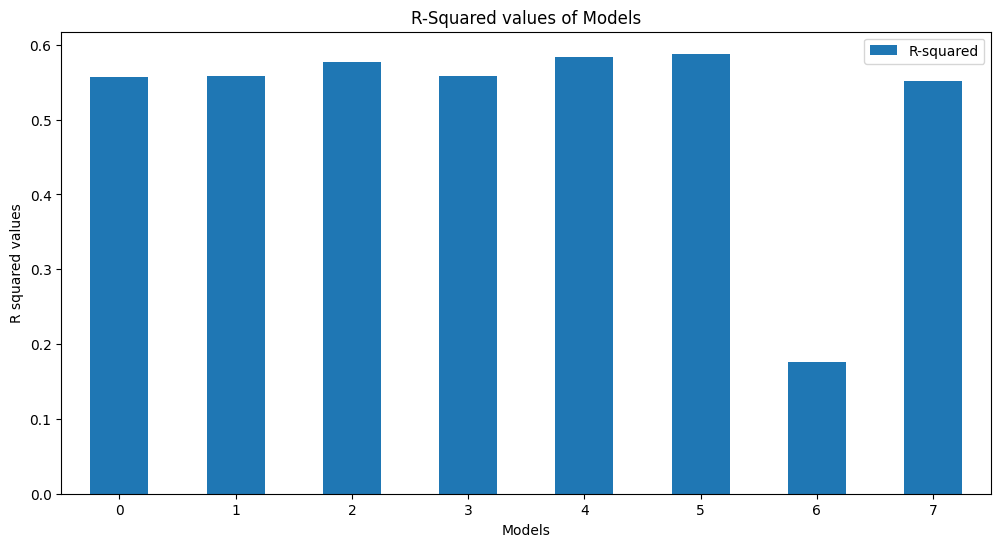

In [73]:
# Plot Models vs R-Sqaured values in a bar chart
df = df_results[['Model','R-squared']]
ax = df.plot(kind='bar', rot=0)

# Set the title and axis labels
ax.set_title('R-Squared values of Models')
ax.set_xlabel('Models')
ax.set_ylabel('R squared values')

# Show the plot
plt.show()

In [74]:
y_final = svm_rbf.predict(df_encoded_test)

In [75]:
type(y_final)

numpy.ndarray

In [76]:
# Save the array to a CSV file
np.savetxt('output.csv', y_final, delimiter=',')

## Feature Importance

In [77]:
sf =  {'Model': [], 'Feature Importance':[]}

selector = SelectKBest(f_regression, k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
#print("Selected features:", selected_features)
sf['Model'].append(str(selector).split('(')[0])
sf['Feature Importance'].append(selected_features.tolist()[0:5])

In [78]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
lasso = Lasso()
ridge = Ridge()
xgb_model = xgb.XGBRegressor()

estimator = [lr,xgb_model,lasso,ridge,dt]

for i in estimator:
  selector = RFE(i, n_features_to_select=8, step=1)
  X_train_selected = selector.fit_transform(X_train, y_train)
  X_test_selected = selector.transform(X_test)
  selected_features = X_train.columns[selector.get_support()]
 # print("Selected features for the",i,'are',selected_features.tolist()[0:5])
  sf['Model'].append(str(i).split('(')[0])
  sf['Feature Importance'].append(selected_features.tolist()[0:5])

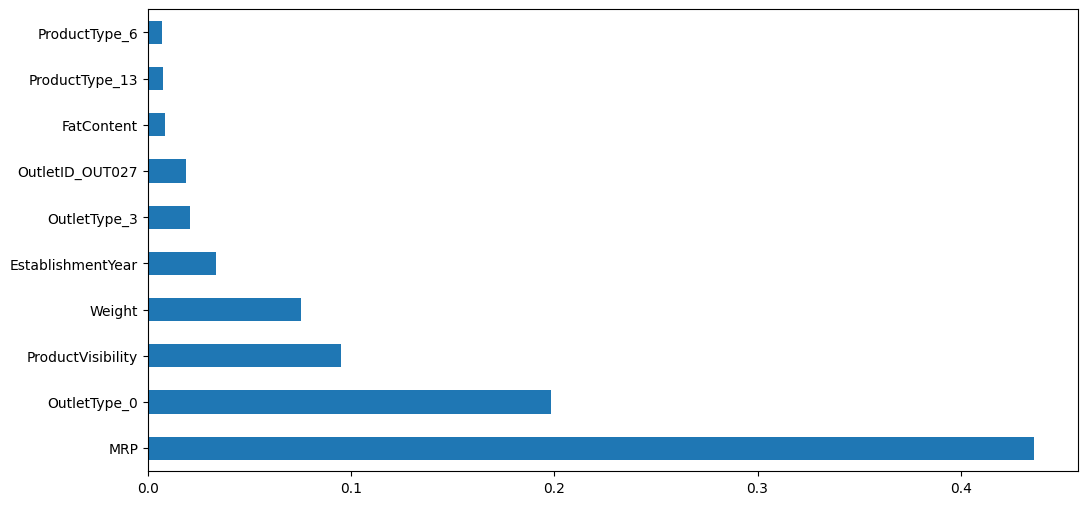

In [79]:
# Fit a random forest model to calculate feature importances
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Plot feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

sf['Model'].append(str("Random Forest").split('(')[0])
sf['Feature Importance'].append(feature_importances.nlargest(5).index.tolist())

In [80]:
# Convert the dictionary to a pandas dataframe and display the feature importances
df_feature_importances = pd.DataFrame(sf)
df_feature_importances

Model                                 Feature Importance
0            SelectKBest  [MRP, OutletID_OUT010, OutletID_OUT019, Outlet...
1       LinearRegression  [OutletID_OUT010, OutletID_OUT018, OutletID_OU...
2           XGBRegressor  [MRP, EstablishmentYear, ProductType_9, Produc...
3                  Lasso  [ProductType_2, ProductType_14, OutletID_OUT01...
4                  Ridge  [OutletID_OUT010, OutletID_OUT019, OutletID_OU...
5  DecisionTreeRegressor  [Weight, FatContent, ProductVisibility, MRP, E...
6          Random Forest  [MRP, OutletType_0, ProductVisibility, Weight,...

# Overall code run time


In [81]:
end_time = time.time()

print("Time taken to run complete notebook", (end_time - start_time)/60, "mintues")

Time taken to run complete notebook 11.851645970344544 mintues
